In [1]:
import pandas as pd
df =pd.read_csv('../data/EmployeeAttrition.csv')


In [2]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# splitting the data target and features
X = df.drop("Attrition",axis=1)
Y = df['Attrition']

In [ ]:
# applying one hot encoding to categorical features
X_ohe = pd.get_dummies(X)

In [6]:
# checking for missing values
X_ohe.isna().sum()

Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager     

In [ ]:
# finding columns with single unique value
rem_col = X_ohe.columns[X_ohe.nunique()==1]

In [9]:
rem_col

Index(['EmployeeCount', 'StandardHours', 'Over18_Y'], dtype='object')

In [ ]:
# dropping those columns
X_ohe.drop(rem_col, axis=1,inplace=True)

In [ ]:
# dropping EmployeeNumber as it is just an identifier
X_ohe.drop("EmployeeNumber",axis=1,inplace=True)

In [ ]:
# removing duplicate rows if any
X_ohe.drop_duplicates(inplace=True)

In [12]:
# checking the target variable unique values
Y.unique()

array(['Yes', 'No'], dtype=object)

In [13]:
# applying label encoding to target variable
Y = Y.replace({'Yes':1, 'No':0})

/var/folders/54/gfhqd5h505l__hz49w789hjr0000gn/T/ipykernel_49870/3805951796.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = Y.replace({'Yes':1, 'No':0})


In [25]:
# standardizing the features
X_ohe_std = (X_ohe-X_ohe.mean())/X_ohe.std()

In [14]:
# applying train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
                    X_ohe,Y,test_size=0.3,random_state=742)

In [15]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1029, 51), (441, 51), (1029,), (441,))

# applying pca on non standrise data 
it will give wrong result

In [16]:
# appling pca on non standardized data
from sklearn.decomposition import PCA
pca = PCA(random_state=7)

In [17]:
pca.fit(X_train,Y_train)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,7


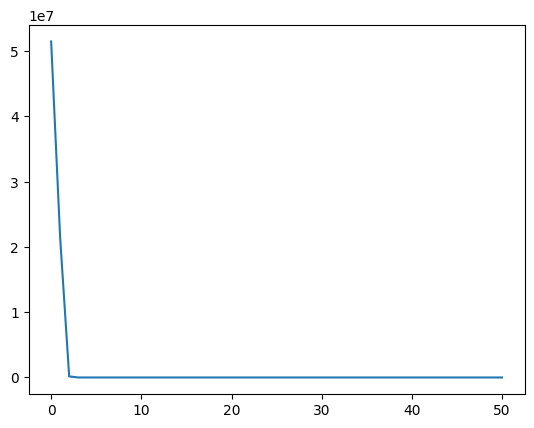

In [18]:
from matplotlib import pyplot as plt
plt.plot(pca.explained_variance_)

# Applying pca on standarize data

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(
                    X_ohe_std,Y,test_size=0.3,random_state=7
                    )

In [27]:
# applying pca on standardized data
pca_std = PCA(random_state=7)
pca_std.fit(X_train,Y_train)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,7


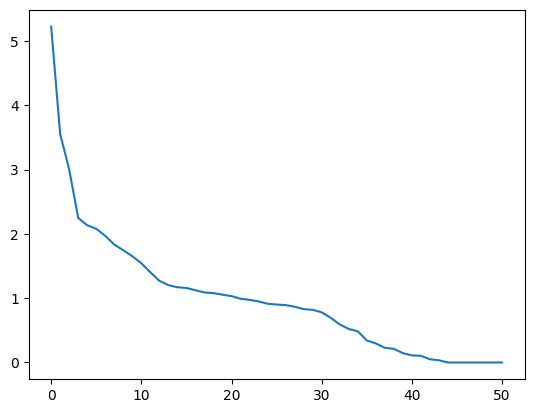

In [28]:
from matplotlib import pyplot as plt
plt.plot(pca_std.explained_variance_)

In [29]:
pca.components_.shape

(51, 51)

In [30]:
# arranged the principal components in descending order of variance
pca_std.explained_variance_ 

array([5.22757860e+00, 3.55571184e+00, 3.00325006e+00, 2.24838973e+00,
       2.13453752e+00, 2.08029464e+00, 1.97010003e+00, 1.83460103e+00,
       1.74606801e+00, 1.65293689e+00, 1.54373286e+00, 1.40394247e+00,
       1.27026021e+00, 1.20353832e+00, 1.17052086e+00, 1.15961201e+00,
       1.12412385e+00, 1.08908832e+00, 1.07945387e+00, 1.05485079e+00,
       1.03232499e+00, 9.91871538e-01, 9.74663653e-01, 9.49573584e-01,
       9.13785256e-01, 9.01093345e-01, 8.93134942e-01, 8.67836671e-01,
       8.29819117e-01, 8.19252257e-01, 7.80133417e-01, 6.96113014e-01,
       5.91677485e-01, 5.21356629e-01, 4.85184628e-01, 3.43261855e-01,
       2.95810420e-01, 2.28270625e-01, 2.12296350e-01, 1.45549077e-01,
       1.10535685e-01, 1.03698472e-01, 5.00095443e-02, 3.43739371e-02,
       3.34011932e-15, 1.52750772e-15, 6.04350105e-16, 7.14096600e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [31]:
# showing which features contribute more to a principal component
import numpy as np
pc1 = pca_std.components_[0]
features = X_ohe_std.columns
pc1_df = pd.DataFrame({'features':features, 'PC1':pc1})
pc1_df['abs_PC1'] = np.abs(pc1_df['PC1'])
pc1_df.sort_values('abs_PC1', ascending=False, inplace=True)
pc1_df.head(10)




,features,PC1,abs_PC1
1,DailyRate,-0.009070,0.009070
49,OverTime_No,0.007353,0.007353
50,OverTime_Yes,-0.007353,0.007353
5,HourlyRate,-0.006581,0.006581
33,EducationField_Other,-0.005776,0.005776
14,RelationshipSatisfaction,0.005101,0.005101
4,EnvironmentSatisfaction,-0.003345,0.003345
8,JobSatisfaction,0.003223,0.003223
6,JobInvolvement,0.002007,0.002007
10,MonthlyRate,0.000535,0.000535
